In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sympy import *

In [2]:
def conc(m, M, V):
  c = m/(M*V)
  return c

def epsilon(A, c_list):
  eps_df = []
  keys = list(A.keys())
  for i in range(len(keys)):
    c = c_list[i]
    eps = A[keys[i]]/c
    # print(eps)
    eps_df.append(eps)
  df_new = pd.concat(eps_df, axis = 1)
  return df_new

def diff_epsilon(A_hcl, c_hcl, A_h2o, c_h2o):
  diff = epsilon(A_hcl, c_hcl) - epsilon(A_h2o, c_h2o)
  return diff

def cross_section(c_list, A):
  sigma_df = []
  keys = list(A.keys())
  for i in range(len(keys)):
    c = c_list[i]
    n=(6.022*10**23)*(c/1000) #c is in mol/L so the divirion by 1000 is conversion from L to cm**3
    sigma=A[keys[i]]/n #l is not included since it is equal to 1cm
    sigma_df.append(sigma)
  new_df = pd.concat(sigma_df, axis = 1)
  return new_df

In [3]:

M_NaCl = 58.44 #g/mol
M_MnCl2 = 197.91 #g/mol
cStart_array = np.array([3.0, 1.5, 1.0, 0.75, 0.5, 0.25, 0.1]) #mol/L
V_NaCl = np.full(7, 0.01) #L
V_pH = np.array([0.05, 0.05, 0.10, 0.05, 0.10, 0.10]) #L

mStart_array = M_NaCl*cStart_array*V_NaCl
print(mStart_array)

m_NaCl = np.array([1.692, 0.882, 0.587, 0.439, 0.342, 0.149, 0.074]) #g
m_MnCl2 = np.array([16.059, 16.139, 17.683, 8.668, 0.0093, 0.0102]) #g

c_NaCl = conc(m_NaCl, M_NaCl, V_NaCl)
c_MnCl2 = conc(m_MnCl2, M_MnCl2, V_pH)
c_MnCl2_forNaCl = [c_MnCl2[2], c_MnCl2[2], c_MnCl2[2], c_MnCl2[2], c_MnCl2[2], c_MnCl2[2], c_MnCl2[2]]
print(c_NaCl)
print(c_MnCl2)

[1.7532  0.8766  0.5844  0.4383  0.2922  0.1461  0.05844]
[2.89527721 1.50924025 1.00444901 0.75119781 0.58521561 0.25496235
 0.1266256 ]
[1.62285888e+00 1.63094336e+00 8.93486939e-01 8.75953716e-01
 4.69910565e-04 5.15385781e-04]


In [4]:
MnCl2_pH_path = "./mncl2_ph.CSV"
MnCl2_pH=pd.read_csv(MnCl2_pH_path, sep=';', decimal=',', index_col = 0)
MnCl2_pH = MnCl2_pH.drop(['hcl'], axis = 1)
# display(MnCl2_pH)

diff_path = './difference_solvent.CSV'
diff_solv = pd.read_csv(diff_path, sep = ';', decimal = ',', index_col = 0)

MnCl2_NaCl_path = "./mncl2_wnacl.CSV"
MnCl2_NaCl=pd.read_csv(MnCl2_NaCl_path, sep=';', decimal=',', index_col = 0)
# display(MnCl2_NaCl)

In [ ]:
diff_highconc = diff_epsilon(MnCl2_pH['s2.3'], c_MnCl2[1], MnCl2_pH['s1.3'], c_MnCl2[0])
diff_lowconc = diff_epsilon(MnCl2_pH['s4.3'], c_MnCl2[3], MnCl2_pH['s3.3'], c_MnCl2[3])
# display(diff_highconc)

In [5]:
cross_sec_fRep = cross_section(c_MnCl2, MnCl2_pH)
cross_sec_fRep.to_csv('cross_sec_ForRep.csv')
cross_sec_fRepShort = cross_sec_fRep.drop(['s5.3', 's6.3'], axis=1)

cross_sec_NaCl = cross_section(c_MnCl2_forNaCl, MnCl2_NaCl)
cross_sec_NaCl.to_csv('cross_sec_wNaCl.csv')

In [6]:
eps_fRep = epsilon(MnCl2_pH, c_MnCl2)
eps_fRep.to_csv('epsilon_fRep.csv')
eps_fRep_short = eps_fRep.drop(['s5.3', 's6.3'], axis=1)

eps_MnCl2_NaCl = epsilon(MnCl2_NaCl, c_MnCl2_forNaCl)
eps_MnCl2_NaCl.to_csv('epsilon_MnCl2_NaCl.csv')

In [7]:
fRep_labels = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl', 
               '4.70$\cdot$10$^{-4}$ M in water', '5.15$\cdot$10$^{-4}$ M in HCl']
fRep_labels_short = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl']
wNaCl_labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', 
                '1.27$\cdot$10$^{-1}$ M']

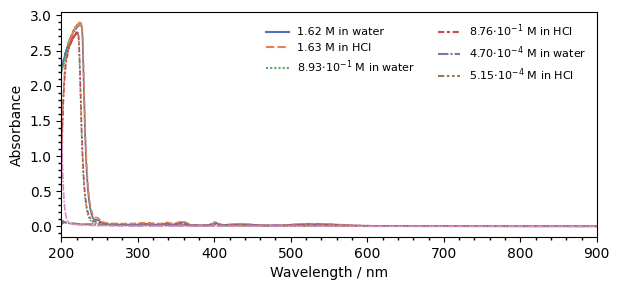

In [38]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_pH, lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = fRep_labels, 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('forpHmeas_full.png', dpi=150)
plt.show()

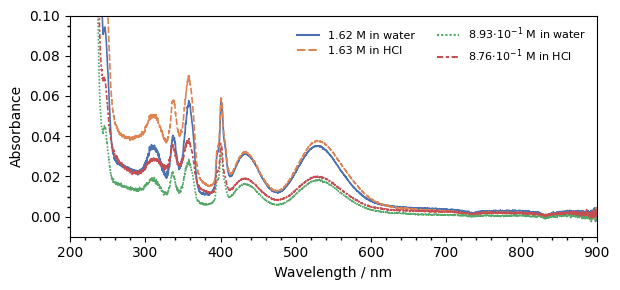

In [39]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_pH[['s1.3', 's2.3', 's3.3', 's4.3']], lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = fRep_labels_short, 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('forpHmeas.png', dpi=150)
plt.show()

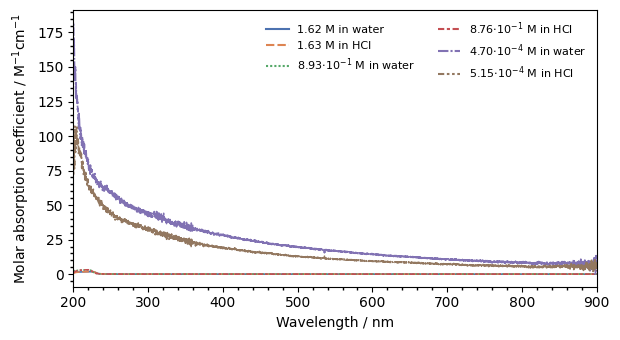

In [35]:
plt.figure(figsize=(6.3,3.5))
sns.set_palette("deep")
ax = sns.lineplot(data = eps_fRep, lw = 1.2) 
ax.set_ylabel(r'Molar absorption coefficient / M$^{-1}$cm$^{-1}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = fRep_labels, 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('eps_fRep_full.png', dpi=150)
plt.show()

C:\Users\nan25\AppData\Local\Temp\ipykernel_19820\1154852298.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


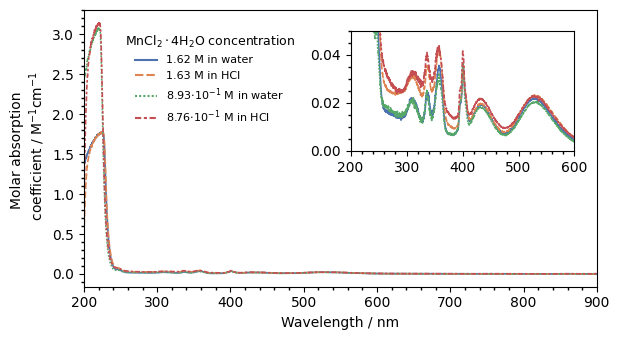

In [83]:
plt.figure(figsize=(6.3,3.5))
sns.set_palette("deep")

ax = sns.lineplot(eps_fRep_short, lw = 1.2) 
ax.set_ylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)

ax.set_xlim(200, 900)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = fRep_labels_short, frameon = False, fontsize = 8, loc = 2, 
           bbox_to_anchor = (0.06, 0.95), title = 'MnCl$_{2}\cdot$4H$_{2}$O concentration', title_fontsize = 9)
# loc = 2, bbox_to_anchor = (0.05, 0.95), ncol = 1      Upper left corner
# loc = 2, bbox_to_anchor = (0.07, 0.3), ncol = 2       Lower left corner
# loc = 2, bbox_to_achor = (0.23, 0.33), ncol = 2       Bottom center
# loc = 4, bbox_to_anchor = (1,1), ncol = 3             On top of figure

inset_ax = inset_axes(ax,
                    width="45%", # width = % of parent_bbox
                    height=1.2, # height : 1 inch
                    bbox_to_anchor=(0, 0, 0.97, 0.95),
                    bbox_transform=ax.transAxes) # placement in figure
                    
plt.tight_layout()

ax = sns.lineplot(eps_fRep_short, lw = 1.2) 

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_ylim(0, 0.05)
ax.set_xlim(200, 600)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
# plt.xticks(rotation = 45, ha = 'right')

plt.legend().set_visible(False)

plt.savefig('eps_fRep_full_1-4.png', dpi=150)
plt.show()

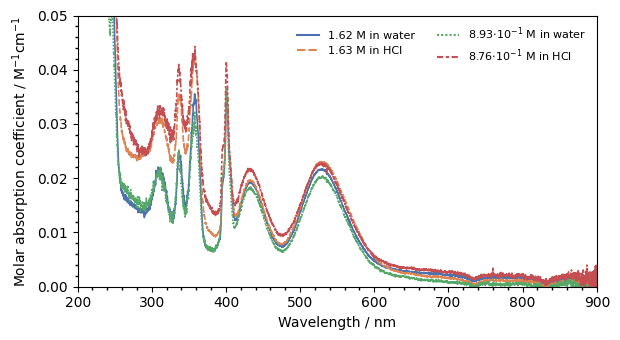

In [33]:
plt.figure(figsize=(6.3,3.5))
sns.set_palette("deep")
ax = sns.lineplot(data = eps_fRep_short, lw = 1.2) 
ax.set_ylabel(r'Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)
ax.set_ylim(0, 0.05)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = fRep_labels_short, 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('eps_fRep_short.png', dpi=150)
plt.show()

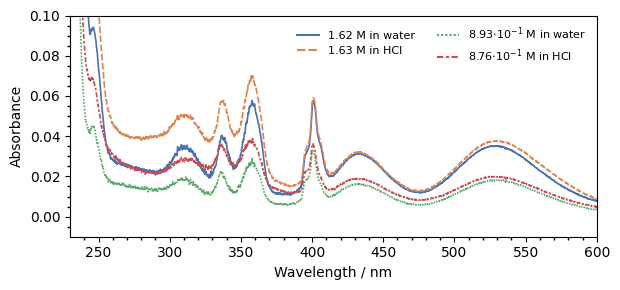

In [40]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_pH[['s1.3', 's2.3', 's3.3', 's4.3']], lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.1)
ax.set_xlim(230, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl'], 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('forpHmeas_zoom.png', dpi=150)
plt.show()

[220.4, 222.6, 224.9, 246.4, 261.7, 264.7, 267.7, 269.6, 271.5, 273.5, 276.2, 278.2, 280.8, 282.4, 285.9, 288.3, 291.0, 292.5, 293.9, 296.3, 298.7, 304.3, 306.0, 308.3, 310.2, 312.2, 314.8, 317.7, 325.6, 329.5, 336.7, 338.6, 358.0, 374.3, 376.8, 377.9, 379.8, 380.9, 382.7, 386.9, 401.0, 413.6, 429.8, 432.8, 472.9, 474.2, 475.5, 476.9, 479.2, 525.9, 527.8, 529.1, 530.1, 533.0, 534.1, 536.7]


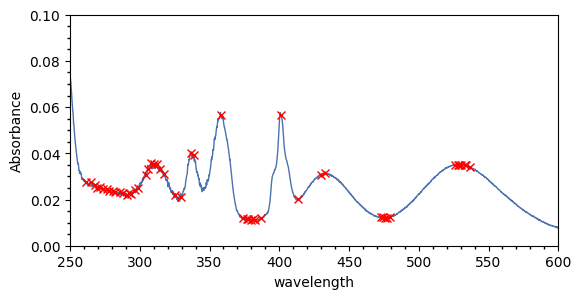

In [59]:
df2 = MnCl2_pH['s1.3'].copy().to_numpy()
for i in range(-4,4):
  df2[5:-6] += df2[5+i:-6+i]
  df2[5:-6] = df2[5:-6]/2
peaksgood, _ = find_peaks(df2[200:4000], distance = 10)
peaksgood = peaksgood + 200

plt.figure(figsize=(6.3,3))
ax = sns.lineplot(data = MnCl2_pH['s1.3'], linewidth = 1)
# plt.plot(MnCl2_only['Sample 1'].index.tolist(), df2, linewidth = 1)
plt.plot(MnCl2_pH['s1.3'].iloc[peaksgood].index.tolist(), MnCl2_pH['s1.3'].iloc[peaksgood].tolist(), "x", color = "r")
print(MnCl2_pH['s1.3'].iloc[peaksgood].index.tolist())
ax.set_ylabel('Absorbance')
ax.set_ylim(0,0.1)
ax.set_xlim(250,600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
# plt.savefig('s1_wmarkers.png', dpi = 150)

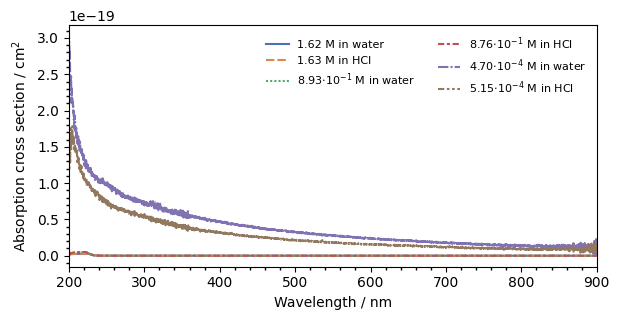

In [43]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_fRep) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl', '4.70$\cdot$10$^{-4}$ M in water', '5.15$\cdot$10$^{-4}$ M in HCl'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('forpHmeas_full_sigma.png', dpi=150)

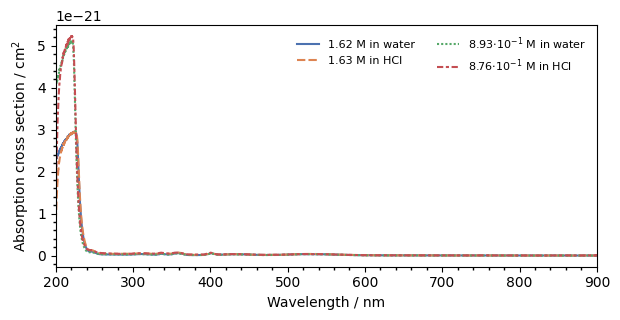

In [44]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_fRepShort) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('ForRep_full_sigma.png', dpi=150)

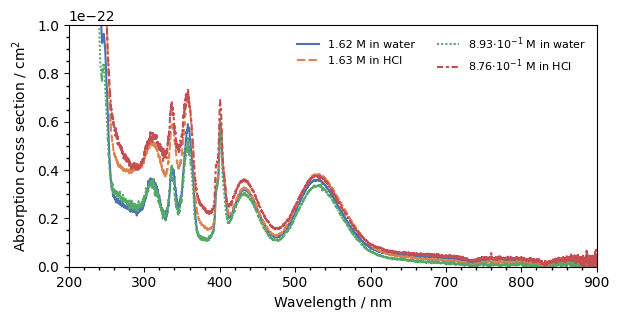

In [45]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_fRepShort) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(0, 10**(-22))
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('ForRep_sigma.png', dpi=150)

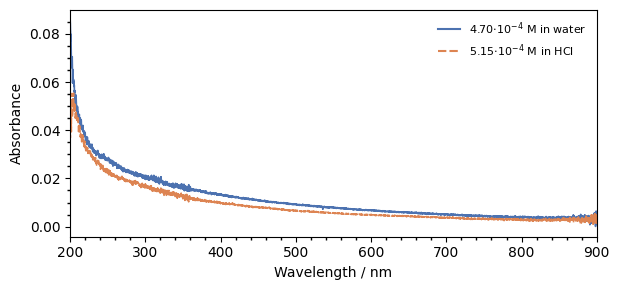

In [46]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_pH[['s5.3', 's6.3']], lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.15)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['4.70$\cdot$10$^{-4}$ M in water', '5.15$\cdot$10$^{-4}$ M in HCl'], 
        frameon = False, fontsize = 8)
plt.tight_layout()
plt.savefig('traceconc_peak.png', dpi=150)
plt.show()

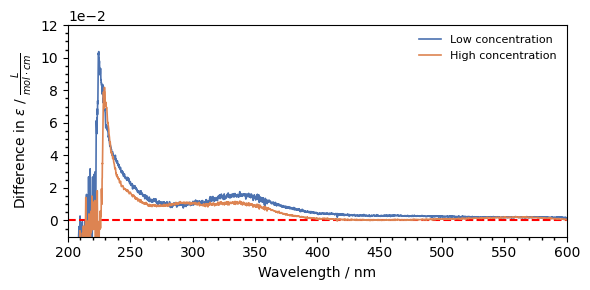

In [47]:
plt.figure(figsize=(6,3))
sns.set_palette("deep")
ax = sns.lineplot(data = diff_lowconc, lw = 1.2, label = 'Low concentration') 
ax.hlines(0, 200, 600, linestyle = '--', color = 'r')
sns.lineplot(data = diff_highconc, lw = 1.2, label = 'High concentration') 
ax.set_ylabel(r'Difference in $\epsilon$ / $\frac{L}{mol\cdot cm}$')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.12)
ax.set_xlim(200, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-2,-2))
# handles, labels = ax.get_legend_handles_labels()
plt.legend(frameon = False, fontsize = 8)
plt.tight_layout()
plt.savefig('difference_solvent.png', dpi=150)
plt.show()

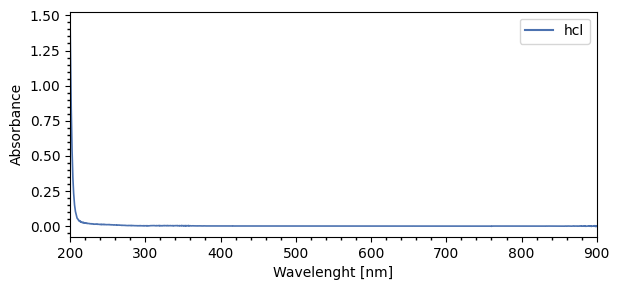

In [48]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_pH[['hcl']], lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelenght [nm]')
# ax.set_ylim(-0.01, 0.15)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles = handles, labels = ['4.70$\cdot$10$^{-4}$ M in water', '5.15$\cdot$10$^{-4}$ M in HCl'], 
#         frameon = False, fontsize = 8)
plt.tight_layout()
plt.savefig('hcl_spec.png', dpi=150)
plt.show()

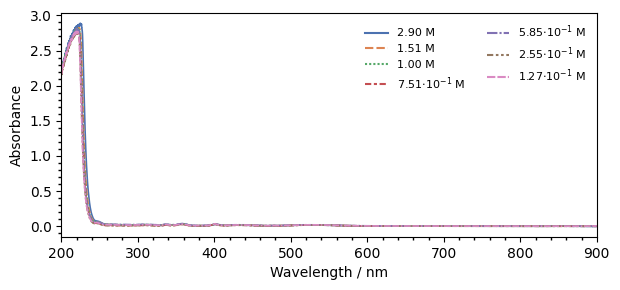

In [49]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_NaCl, lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.35)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', '1.27$\cdot$10$^{-1}$ M'], 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('mncl2_nacl_full.png', dpi=150)
plt.show()

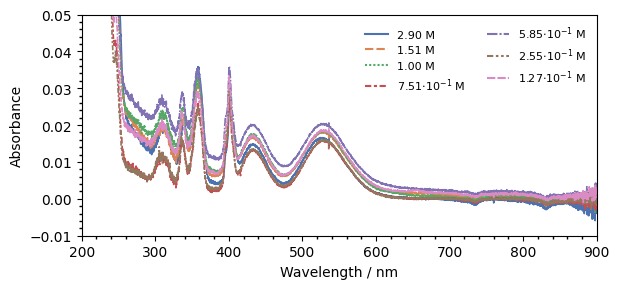

In [50]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_NaCl, lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(-0.01, 0.05)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', '1.27$\cdot$10$^{-1}$ M'], 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('mncl2_nacl.png', dpi=150)
plt.show()

C:\Users\nan25\AppData\Local\Temp\ipykernel_19820\1589382384.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


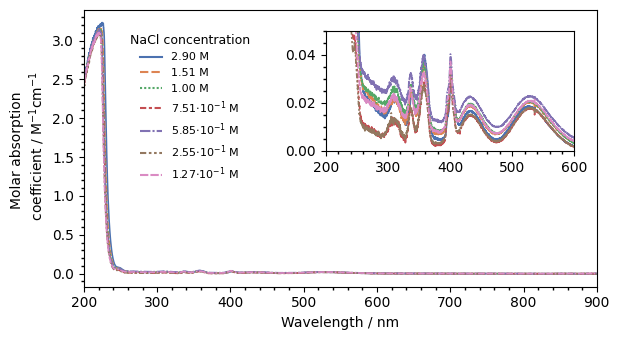

In [81]:
plt.figure(figsize=(6.3,3.5))
sns.set_palette("deep")

ax = sns.lineplot(eps_MnCl2_NaCl, lw = 1.2) 
ax.set_ylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)

ax.set_xlim(200, 900)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = wNaCl_labels, frameon = False, fontsize = 8, loc = 2, 
           bbox_to_anchor = (0.07, 0.95), title = 'NaCl concentration', title_fontsize = 9)

inset_ax = inset_axes(ax,
                    width="50%", # width = % of parent_bbox
                    height=1.2, # height : 1 inch
                    bbox_to_anchor=(0, 0, 0.97, 0.95),
                    bbox_transform=ax.transAxes) # placement in figure
plt.tight_layout()

ax = sns.lineplot(eps_MnCl2_NaCl, lw = 1.2) 

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_ylim(0, 0.05)
ax.set_xlim(200, 600)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
# plt.xticks(rotation = 45, ha = 'right')

plt.legend().set_visible(False)

plt.savefig('eps_wNaCl_full.png', dpi=150)
plt.show()

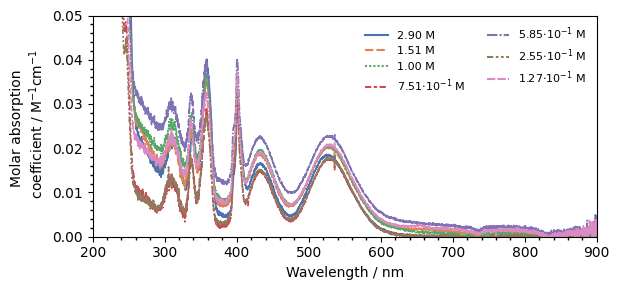

In [56]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = eps_MnCl2_NaCl, lw = 1.2) 
ax.set_ylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)
ax.set_ylim(0, 0.05)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = wNaCl_labels, frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('eps_wNaCl_short.png', dpi=150)
plt.show()

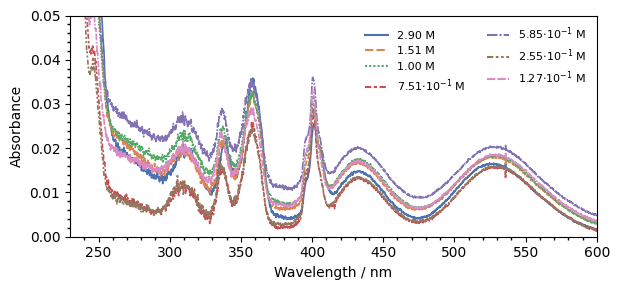

In [51]:
plt.figure(figsize=(6.3,3))
sns.set_palette("deep")
ax = sns.lineplot(data = MnCl2_NaCl, lw = 1.2) 
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavelength / nm')
ax.set_ylim(0.0, 0.05)
ax.set_xlim(230, 600)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', '1.27$\cdot$10$^{-1}$ M'], 
        frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('mncl2_nacl_zoom.png', dpi=150)
plt.show()

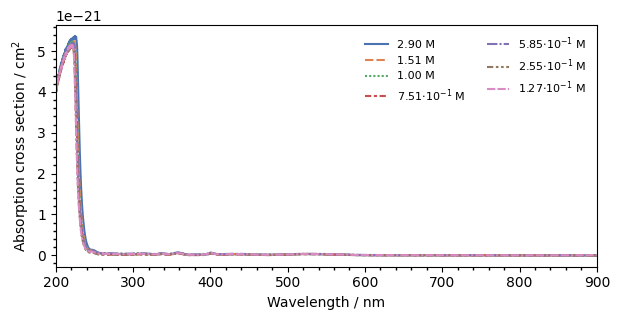

In [52]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_NaCl) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelength / nm')
# ax.set_ylim(-0.01, 0.1)
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', '1.27$\cdot$10$^{-1}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('wNaCl_full_sigma.png', dpi=150)

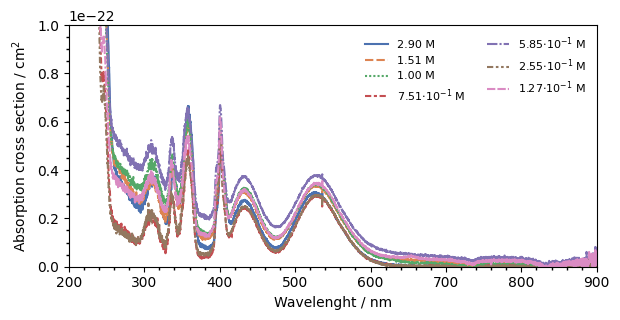

In [53]:
plt.figure(figsize=(6.3,3.3))
sns.set_palette("deep")
ax = sns.lineplot(data = cross_sec_NaCl) 
ax.set_ylabel(r'Absorption cross section / cm$^{2}$')
ax.set_xlabel('Wavelenght / nm')
ax.set_ylim(0, 10**(-22))
ax.set_xlim(200, 900)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = ['2.90 M', '1.51 M', '1.00 M', '7.51$\cdot$10$^{-1}$ M', '5.85$\cdot$10$^{-1}$ M', '2.55$\cdot$10$^{-1}$ M', '1.27$\cdot$10$^{-1}$ M'],
           frameon = False, ncol = 2, fontsize = 8)
plt.tight_layout()
plt.savefig('wNaCl_sigma.png', dpi=150)